In [1]:
!pip install numpy

In [14]:
!pip install pandas

In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 13.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 11.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 13.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 9.3 MB/s eta 0:00:00ta 0:00:01


In [3]:
!pip install seaborn

In [10]:
!pip install matplotlib

In [17]:
import tensorflow as tf
import numpy as np
import seaborn as sns
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(len(x_train))

60000


In [66]:
len(y_train)

60000

In [67]:
y_train[:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [68]:
print(x_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [69]:
x_train_data = np.array(x_train)
y_train_data = np.array(y_train)
print(x_train_data.shape)
print(y_train_data.shape)
train_data = pd.DataFrame()
#train_data = np.concatenate((x_train_data, y_train_data), axis=1)
#print(train_data.shape())

(60000, 28, 28)
(60000,)


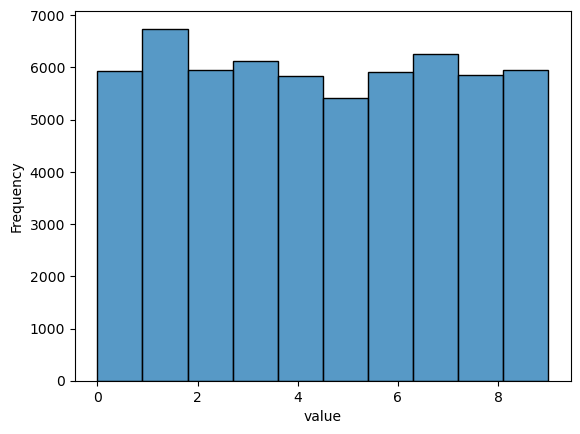

In [70]:
sns.histplot(y_train_data, bins=10)
plt.xlabel("value")
plt.ylabel("Frequency")
plt.show()

In [72]:
labels = np.unique(y_train_data)
print(labels)

[0 1 2 3 4 5 6 7 8 9]


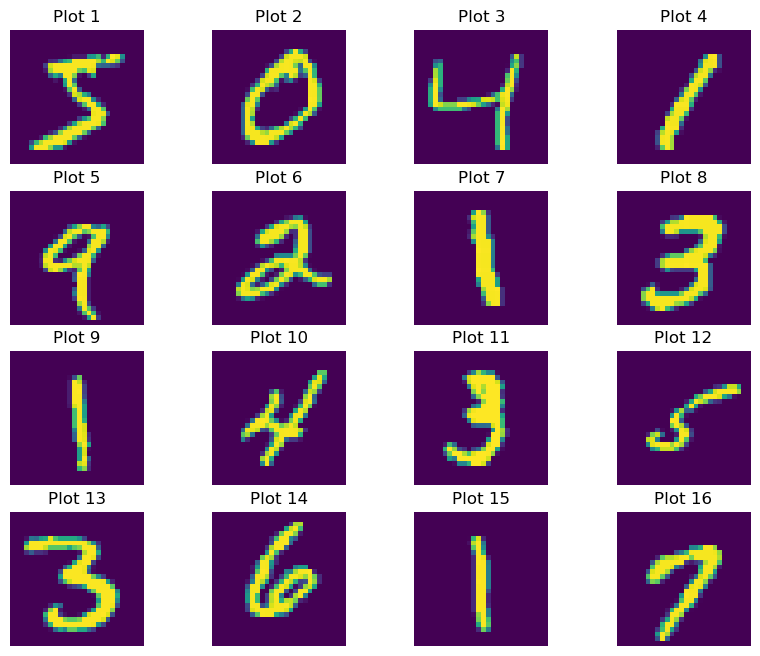

In [77]:
fig, axes = plt.subplots(4, 4, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    im = ax.imshow(x_train_data[i])
    ax.set_title(f"Plot {i+1}")
    ax.axis('off')

In [73]:
print(x_train_data[0].shape)
print(np.max(x_train_data))

(28, 28)
255


In [74]:
x_test_data = np.array(x_test)
y_test_data = np.array(y_test)

In [79]:
# Normalizing dataset
x_train_data = x_train_data.reshape(x_train_data.shape[0], x_train_data.shape[1], x_train_data.shape[2], 1)
x_train_data = x_train_data / 255.0
x_test_data = x_test_data.reshape(x_test_data.shape[0], x_test_data.shape[1], x_test_data.shape[2], 1)
x_test_data = x_test_data / 255.0


In [75]:
print(np.isnan(x_train_data).any())
print(np.isnan(y_train_data).any())
print(np.isnan(x_test_data).any())
print(np.isnan(y_test_data).any())

False
False
False
False


In [81]:
np.max(x_train_data)

1.0

In [82]:
input_shape = (28, 28, 1)

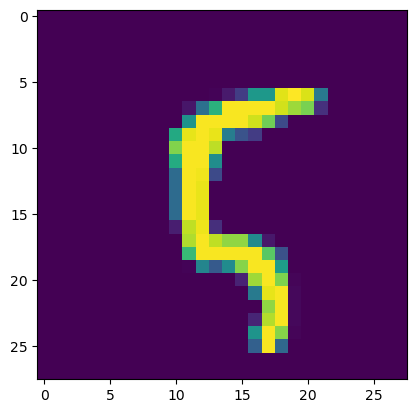

In [88]:
plt.imshow(x_train_data[100])

In [90]:
y_train_data = tf.one_hot(y_train_data.astype(np.int32), depth=10)
y_test_data = tf.one_hot(y_test_data.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


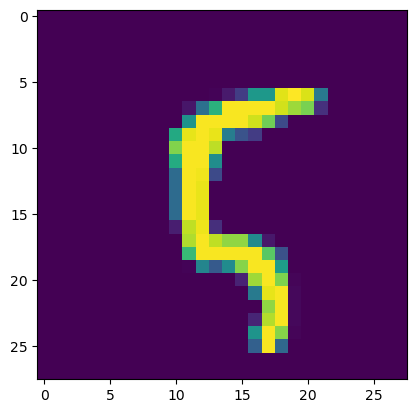

In [92]:
print(y_train_data[100])
plt.imshow(x_train_data[100])

In [93]:
print(x_train_data[0].shape)

(28, 28, 1)


In [94]:
batches = 64
num_classes = 10
epochs = 5
input_shape = (28, 28, 1)

In [96]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [98]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('acc')>0.995):
            print("\nReached 99.5% accuracy so training is stopped.")
            self.model.stop_training = True

callbacks = myCallback()

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


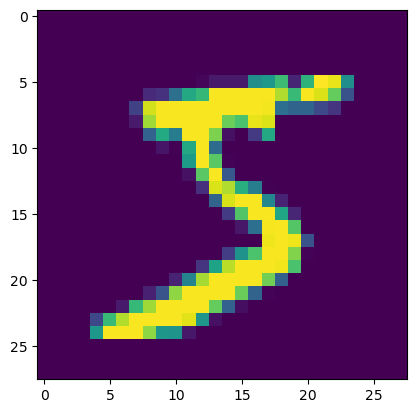

In [100]:
print(y_train_data[0])
plt.imshow(x_train_data[0])

In [101]:
history = model.fit(x_train_data, y_train_data,
                    batch_size=batches,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - acc: 0.8964 - loss: 0.3284 - val_acc: 0.9858 - val_loss: 0.0464
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - acc: 0.9863 - loss: 0.0431 - val_acc: 0.9897 - val_loss: 0.0381
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - acc: 0.9918 - loss: 0.0260 - val_acc: 0.9910 - val_loss: 0.0303
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - acc: 0.9941 - loss: 0.0188 - val_acc: 0.9928 - val_loss: 0.0282
Epoch 5/5
842/844 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.9959 - loss: 0.0132
Reached 99.5% accuracy so training is stopped.
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - acc: 0.9959 - loss: 0.0132 - val_acc: 0.9940 - val_loss: 0.0280


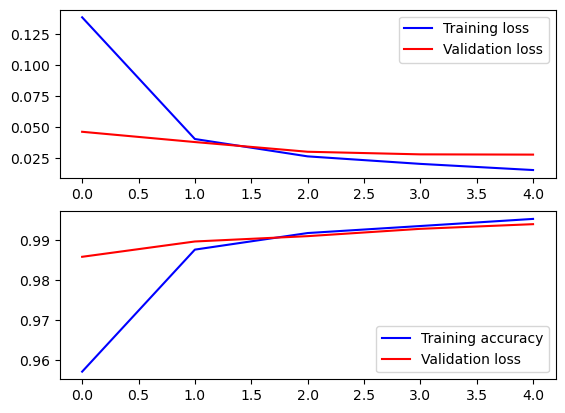

In [102]:
fig, axes = plt.subplots(2, 1)
axes[0].plot(history.history['loss'], color = 'blue', label = 'Training loss')
axes[0].plot(history.history['val_loss'], color = 'red', label = 'Validation loss')
legend = axes[0].legend(loc='best')

axes[1].plot(history.history['acc'], color = 'blue', label = 'Training accuracy')
axes[1].plot(history.history['val_acc'], color = 'red', label = 'Validation loss')
legend = axes[1].legend(loc='best')

In [103]:
test_loss, test_acc = model.evaluate(x_test_data, y_test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9897 - loss: 0.0291


In [104]:
Y_pred = model.predict(x_test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [107]:
print(Y_pred[2:4])

[[2.6625960e-08 9.9997753e-01 2.0169941e-07 7.0572770e-09 1.1143555e-05
  3.8442820e-07 8.7317864e-07 6.3760931e-06 3.3445267e-06 9.2565770e-08]
 [9.9998927e-01 3.6516103e-12 6.7455919e-10 3.8336049e-12 2.5661630e-12
  7.4438239e-10 1.0758968e-05 2.0888171e-11 2.3141029e-08 2.1273065e-08]]


In [110]:
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test_data, axis=1)
conf_matrix = tf.math.confusion_matrix(Y_true, Y_pred_classes)

<Axes: >

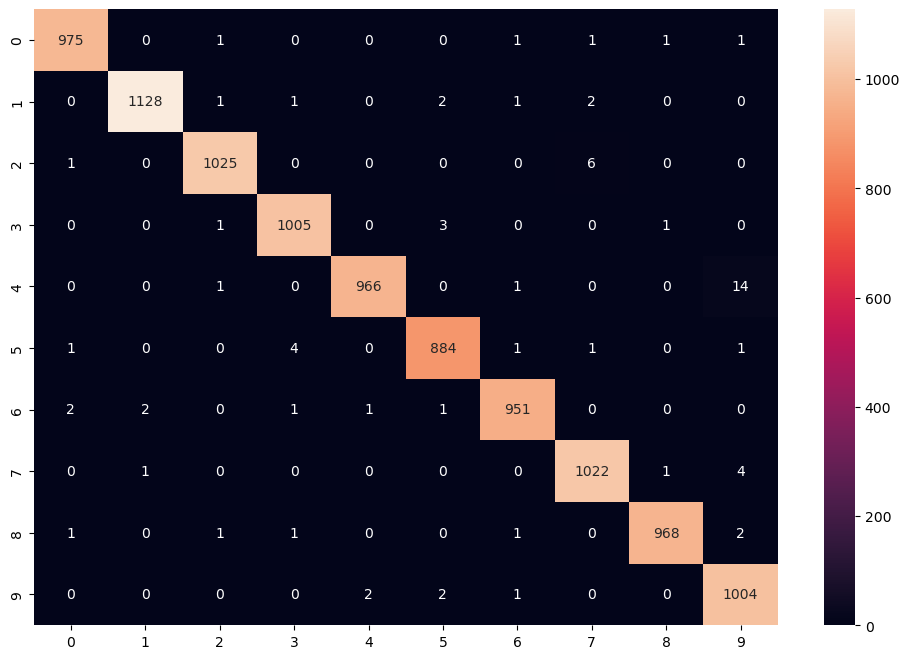

In [114]:
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g')

# Creating very basic CNN, trying on another dataset like CIFAR for next.

## What I did
 - Initially understood data a little bit, and checked for nulls. Understood input dimensionality.
 - Developed model architecture
    - Conv2d (input) -> Conv2d -> MaxPooling -> Conv2d -> Conv2d -> MaxPooling -> Flatten -> Dense -> Dense (output)

- Conv2d: slides kernel of specified size over pixel area, applying a function
- MaxPooling: Reduces spatial dimensionality
- Flatten: Reduces data to 1 dimension
- Dense: Just transforms data by matrix multiplication

## Next steps
 - Learn the different layers: dropout.
 - Learn more activation functions, vanishing gradients, strides.
